In [395]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

In [396]:
df=pd.read_csv("weatherHistory.csv")

In [397]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


DATA CLEANING

In [398]:
df.info()#info about the dataframe used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [399]:
df.describe()# statistical info about the dataframe used

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [400]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [401]:
df['Loud Cover'].unique()

array([0.])

In [402]:
df.drop('Loud Cover',axis='columns',inplace=True)#since 'loud cover' column is of no significance since it contains only one value that is zero!the significance can be checked using univariate filter methods

In [403]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [404]:
df.corr()#to find correlation between columns,since we need to predict apparent temperature from the given data and temperature and apparent temperature are highly correlated then we need to drop rest of the columns.

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


DROPPING HIGHLY CORRELATED COLUMNS

In [405]:
df.drop('Formatted Date',axis='columns',inplace=True)#data column is irrelevant for now and tough to encode.
df.drop('Daily Summary',axis='columns',inplace=True)#column give similar results and highly correlated with Summary column.
df.drop('Wind Speed (km/h)',axis='columns',inplace=True)
df.drop('Wind Bearing (degrees)',axis='columns',inplace=True)
df.drop('Visibility (km)',axis='columns',inplace=True)
df.drop('Pressure (millibars)',axis='columns',inplace=True)

In [406]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [407]:
#now we need to encode summary column values.for that we use labelencoder provided by sklearn preprocessing library.
le=LabelEncoder()
var=df['Summary']
le.fit(var)
le.classes_#to display unique types of data present
var_one=le.transform(var)#to transform data to encoded format
df['Summary']=var_one

In [408]:
df['Precip Type'].value_counts()#we do the encoding for this column too(0-rain,1-snow,2-NaN)

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [409]:
precip=df['Precip Type']
le.fit(precip)
le.classes_
var_two=le.transform(precip)
df['Precip Type']=var_two

In [410]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity
0,19,0,9.472222,7.388889,0.89
1,19,0,9.355556,7.227778,0.86
2,17,0,9.377778,9.377778,0.89
3,19,0,8.288889,5.944444,0.83
4,17,0,8.755556,6.977778,0.83


NORMALIZATION

In [411]:
normalize_list=np.asanyarray(df[['Precip Type','Summary','Temperature (C)','Humidity']])
normalize_final=normalize(normalize_list)
normalize_final.shape
#In the above normalize method we passes categorical valued columns though we need not to but that needs to be rectified since we couldnt merge those two columns with the normalized value array excluding those two columns.

(96453, 4)

In [412]:
X=normalize_final
y=np.asanyarray(df[['Apparent Temperature (C)']])

TRAIN-TEST-SPLIT

In [413]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

LINEAR REGRESSION CODE STARTS HERE

In [414]:
LR=LinearRegression()

In [415]:
LR.fit(X_train,y_train)

LinearRegression()

In [416]:
LR.coef_

array([[  63.82406135,   -5.12353711,   23.50729337, -130.81642009]])

In [417]:
LR.intercept_

array([8.01408047])

In [418]:
predicted=LR.predict(X_test)

ERROR ANALYSIS AND COMPARISONS

In [419]:
df2=pd.DataFrame(y_test)
df2['Predicted']=predicted
df2.rename(columns={0:'Actual'},inplace=True)
df2

,Actual,Predicted
0,11.161111,9.868879
1,22.105556,20.754322
2,31.988889,24.676659
3,-0.527778,-10.702307
4,23.655556,20.414252
...,...,...
19286,2.050000,2.334798
19287,26.044444,22.161478
19288,13.983333,16.135778
19289,22.872222,20.488668


In [420]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Absolute Error: 2.5073302980113072
Mean Squared Error: 12.68512708888033


<AxesSubplot:>

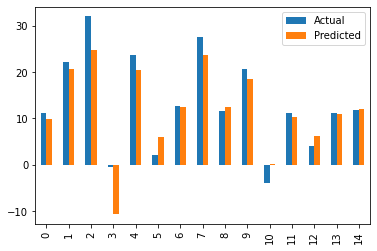

In [422]:
graph=df2.head(15)
graph.plot(kind='bar')